In [6]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
mpl.style.use('seaborn-colorblind')
from ticktack import resample
import pandas as pd
import jax.numpy as jnp
from jax import jit
from scipy.ndimage.filters import gaussian_filter1d as gaussfilt
from astropy.table import Table

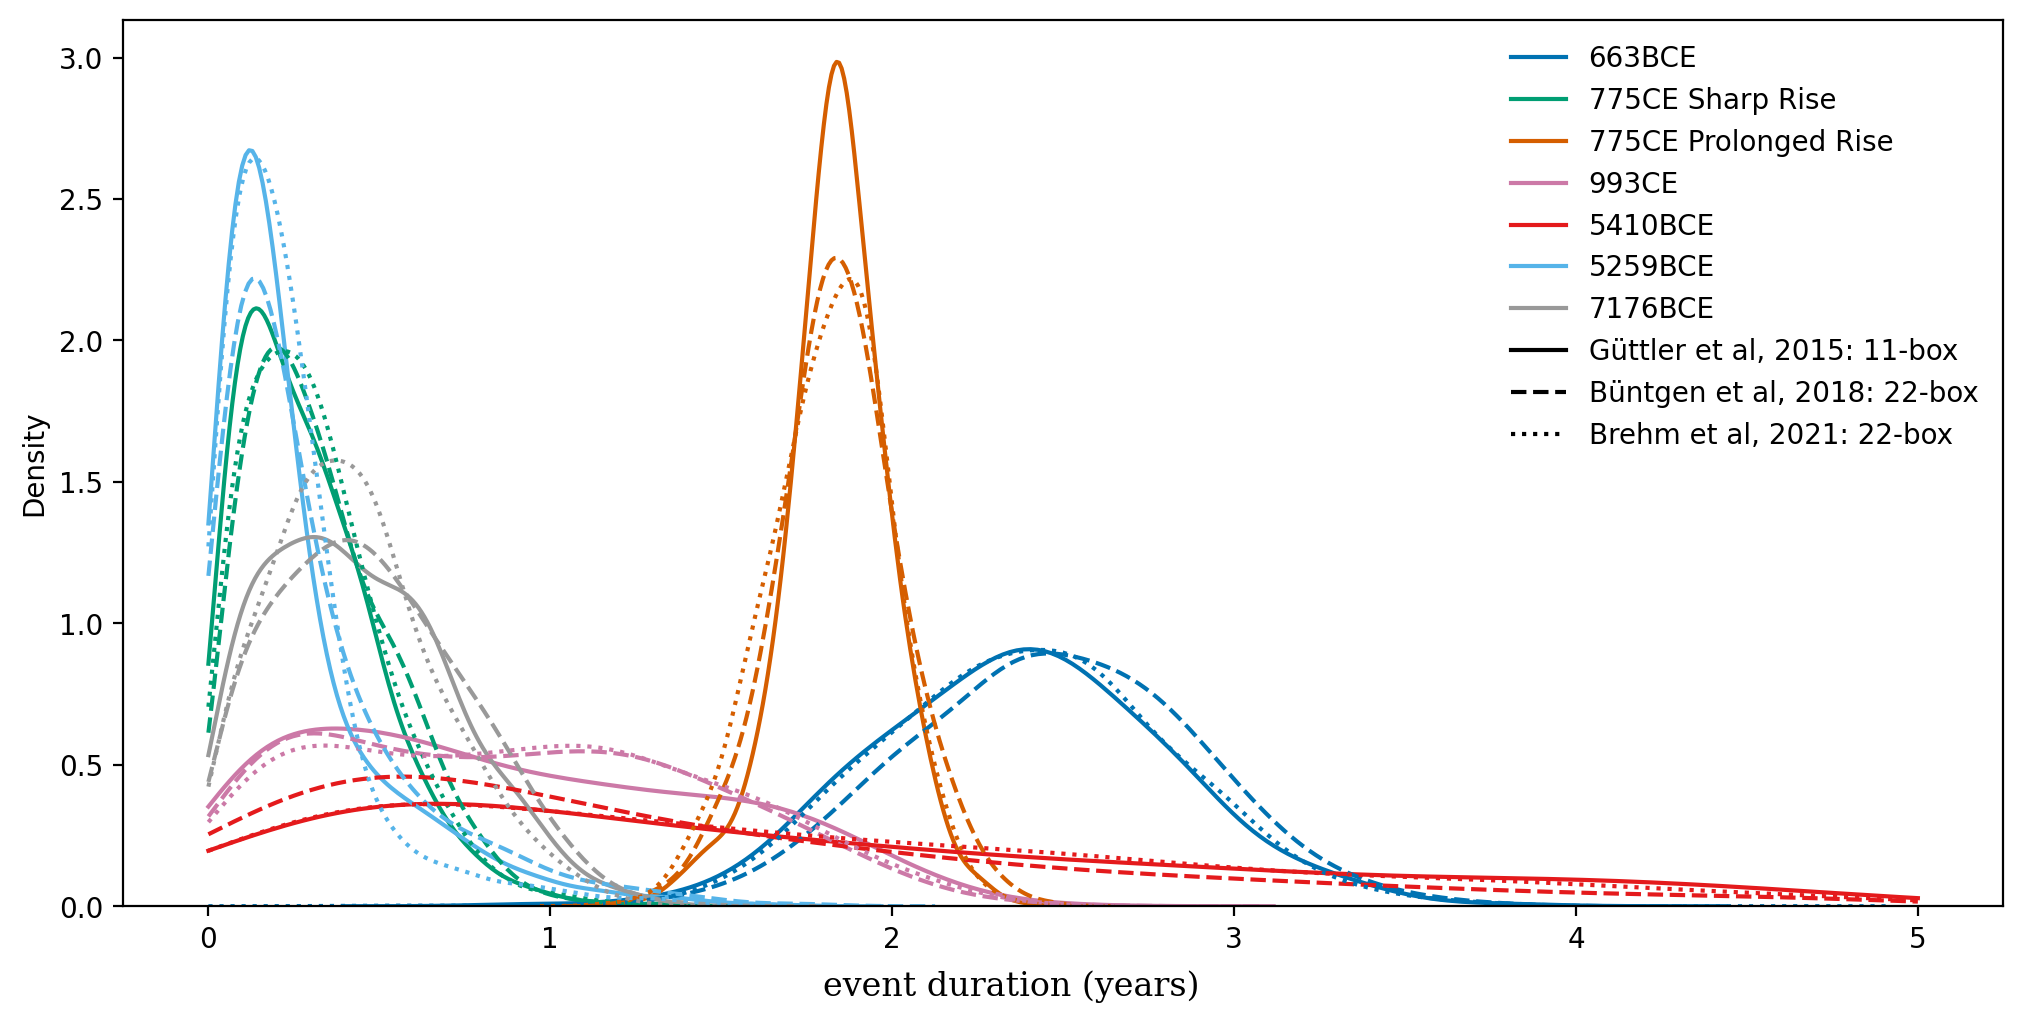

In [20]:
import seaborn as sns
cbm_names = ["Güttler et al, 2015: 11-box", "Büntgen et al, 2018: 22-box", "Brehm et al, 2021: 22-box"]
colors = ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#e41a1c', '#56B4E9', '#999999', ]
events = ["663BCE", "775AD-Sharp", "775AD-Prolonged", "993AD", "5410BCE", "5259BCE", "7176BCE"]
event_labels = ["663BCE", "775CE Sharp Rise", "775CE Prolonged Rise", "993CE", "5410BCE", "5259BCE", "7176BCE"]
# events = ["775CE", "993CE"]
models = ["Guttler15", "Buntgen18", "Brehm21"]
fmt = ["-", "--", ":"]
custom_lines = [Line2D([0], [0], color=colors[i], lw=1.5, label=event_labels[i]) for i in range(len(event_labels))]+\
[Line2D([0], [0], color="k", ls=fmt[i], lw=1.5, label=cbm_names[i]) for i in range(len(cbm_names))]
    
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0, 0])

for j, model in enumerate(models):
    data = []
    for i, event in enumerate(events):
        data = np.load("chain/" + event + "_" + model + ".npy")
        sns.kdeplot(data[:, 2], ls=fmt[j], color=colors[i], ax=ax, bw_adjust=2, clip=(0, 5)); 

ax.legend(handles=custom_lines, frameon=False, fontsize=10, loc="upper right");
fig.supxlabel("event duration (years)", fontsize=12, fontfamily="serif", fontweight="roman");
fig.savefig("duration_density.jpg")